# 1. Explonatory Data Analysis

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
raw_spotify_data = pd.read_csv('./spotify_data/data.csv', parse_dates = ['release_date'])

In [123]:
raw_spotify_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxL...,0.563,10,0.1510,-12.428,1,Singende Bataill...,0,1928-01-01,0.0506,118.469,0.7790,1928
1,0.994,['Robert Schuman...,0.379,282133,0.0135,0,6KuQTIu1KoTTkLXK...,0.901,8,0.0763,-28.454,1,"Fantasiestücke, ...",0,1928-01-01,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszcz...,0.749,104300,0.2200,0,6L63VW0PibdM1HDS...,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Z...,0,1928-01-01,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Cana...,0.781,180760,0.1300,0,6M94FkXd15sOAOQY...,0.887,1,0.1110,-14.734,0,Bebamos Juntos -...,0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,['Frédéric Chopi...,0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxk...,0.908,11,0.0980,-16.829,1,Polonaise-Fantai...,1,1928-01-01,0.0424,62.149,0.0693,1928


Next we will use describe function to find out the statistics of the entire dataset.

An explanation of each feature can be found here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

Primary:
- id (Id of track generated by Spotify)
  
Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)



Next we can use "info" function in order to see the number of values and datatype for each feature column.

In [124]:
raw_spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acousticness      169909 non-null  float64       
 1   artists           169909 non-null  object        
 2   danceability      169909 non-null  float64       
 3   duration_ms       169909 non-null  int64         
 4   energy            169909 non-null  float64       
 5   explicit          169909 non-null  int64         
 6   id                169909 non-null  object        
 7   instrumentalness  169909 non-null  float64       
 8   key               169909 non-null  int64         
 9   liveness          169909 non-null  float64       
 10  loudness          169909 non-null  float64       
 11  mode              169909 non-null  int64         
 12  name              169909 non-null  object        
 13  popularity        169909 non-null  int64         
 14  rele

The figure above shows that no column has any missing elements and there are non-numeric columns such as name, artists, id and a datetime column.

In [125]:
raw_spotify_data.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
explicit,169909.0,0.084863,0.278679,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
key,169909.0,5.200519,3.515257,0.0,2.0000,5.000000,8.0000,11.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
mode,169909.0,0.708556,0.454429,0.0,0.0000,1.000000,1.0000,1.000


Our target column *Popularity* has a mean 31.55 with standart deviation 21.58



We can plot histograms of all of our features

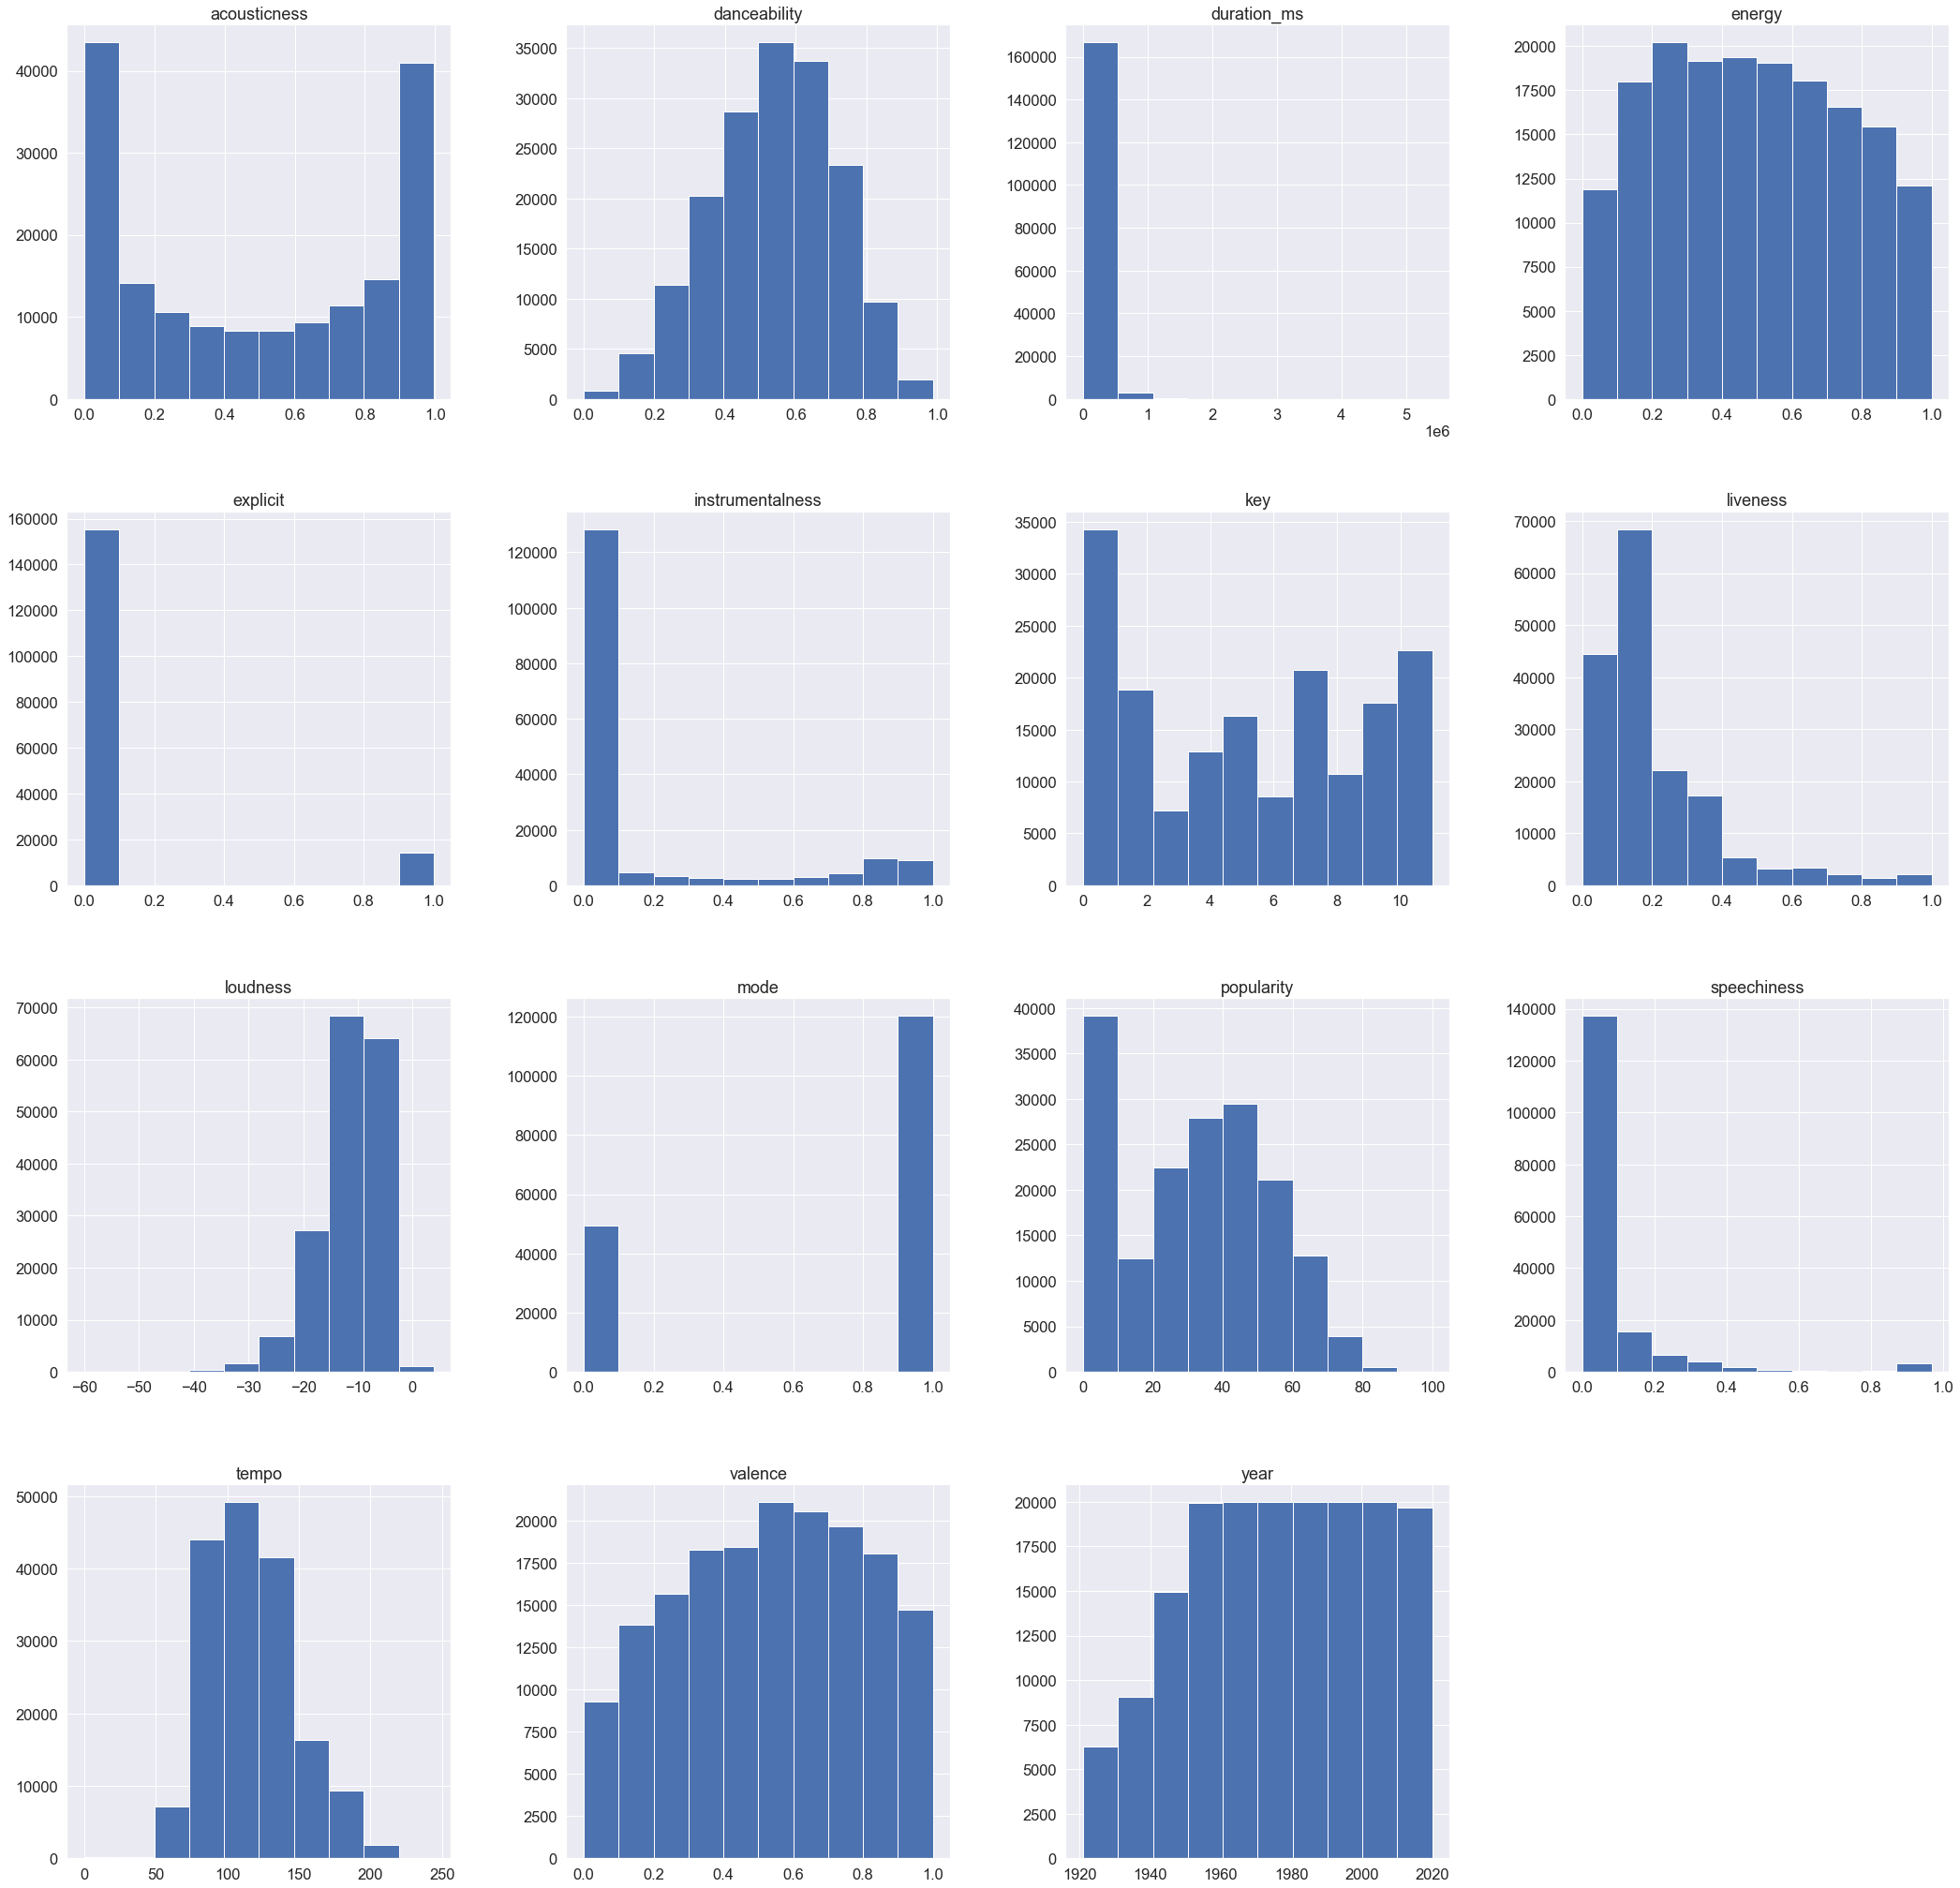

In [126]:
raw_spotify_data.hist(figsize=(36,36))
plt.show()

Next we can use countplot to have a quick view of how many songs we have for each popularity rating.

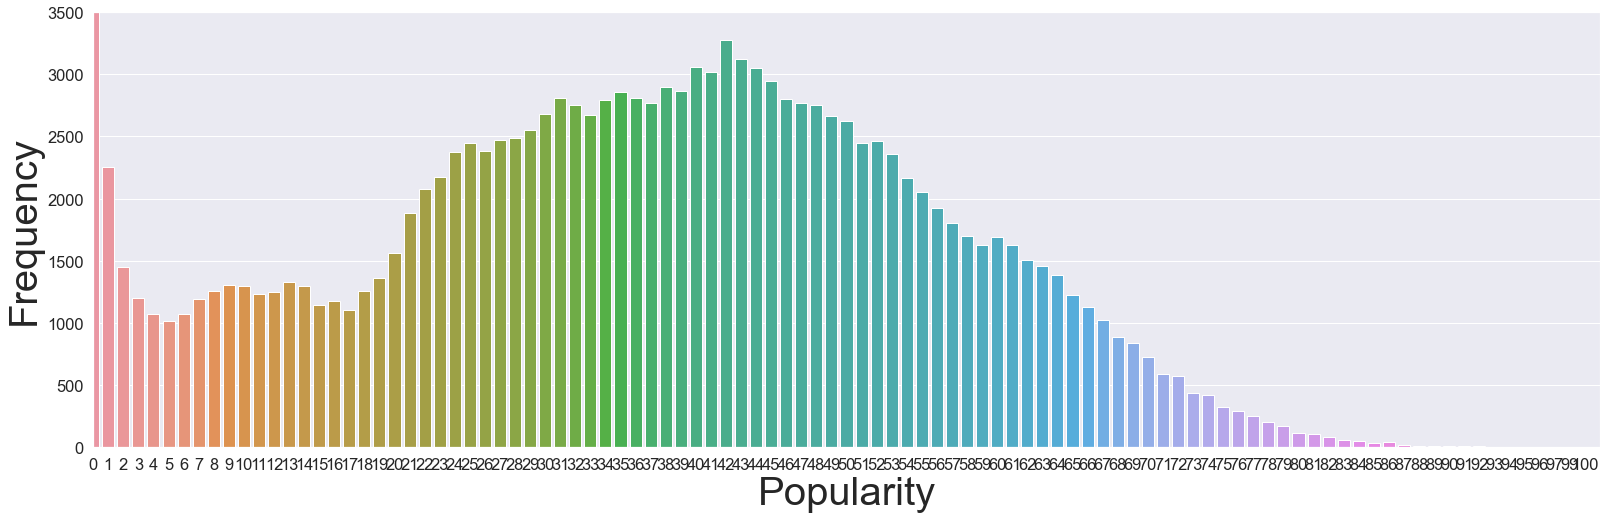

In [127]:
plt.figure(figsize=(27, 8))
counts = sns.countplot(x = raw_spotify_data["popularity"])
counts.set(xlim=(0,100), ylim=(0,3500))
counts.set_xlabel("Popularity",fontsize=40)
counts.set_ylabel("Frequency",fontsize=40)
plt.show()

Next, we can look at how many songs have 0 popularity rating which the chart above doesn't show. 

In [128]:
raw_spotify_data[raw_spotify_data.popularity == 0].shape[0]

27357

Because the number of songs with "0" popularity are much higher compared to the number of songs with other ratings, we have cut the "y" axis above at 3500 to show all ratings other than 0.

Next we can check kurtosis which is a statistical measure that illustrates how heavily the tails of distribution differ from those of a normal distribution. This technique can identify whether a given distribution contains extreme values. The negative kurtosis value for popularity means that the distribution doesn't have too many outliers. ( Mukhiya et al.Hands-On Exploratory Data Analysis with Python)

In [129]:
print(raw_spotify_data.loc[:,"popularity"].kurt())

-1.0150008070115726


Correlations between all futures of the dataset can be seen below

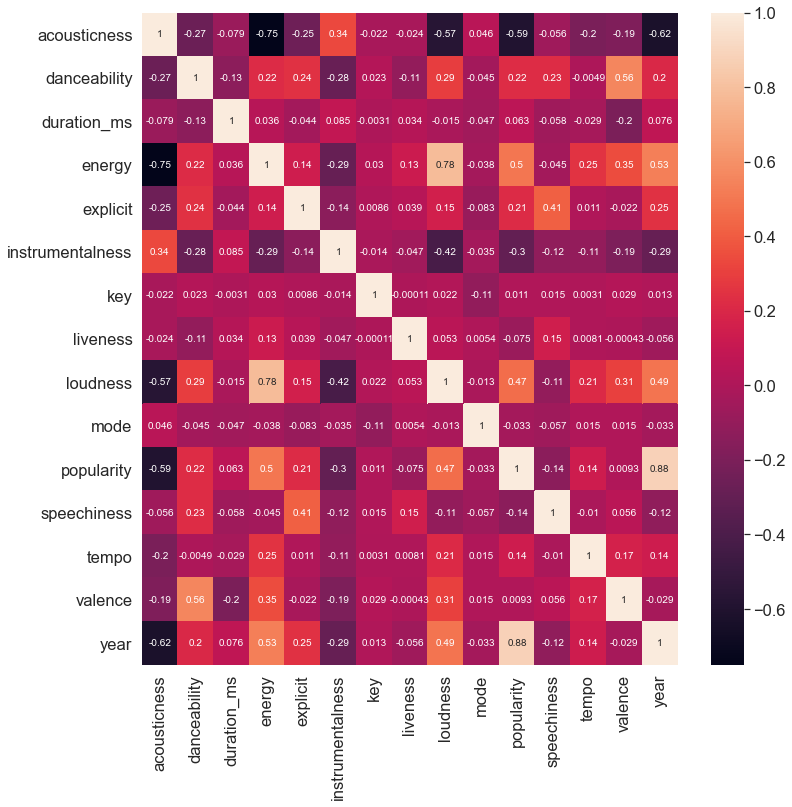

In [130]:
plt.figure(figsize=(12, 12))
sns.set(font_scale=1.5)
sns.heatmap(raw_spotify_data.corr(),annot=True, annot_kws={"size": 10})

From the figure, popularity seems to have strong positive correlations with year, energy and loudness in descending order. Danceability, explicit and tempo have somewhat weaker correlations with popularity. Acousticness seems to have a strong negative correlation with popularity. Instrumentalness and speechiness have weaker negative correlations with popularity. In these cases, we believe that correlation is indicating causation. It is not surprising that newer songs are more popular. Also, it is expected that in today’s pop culture, louder songs with high energy, high tempo and danceability are more popular.

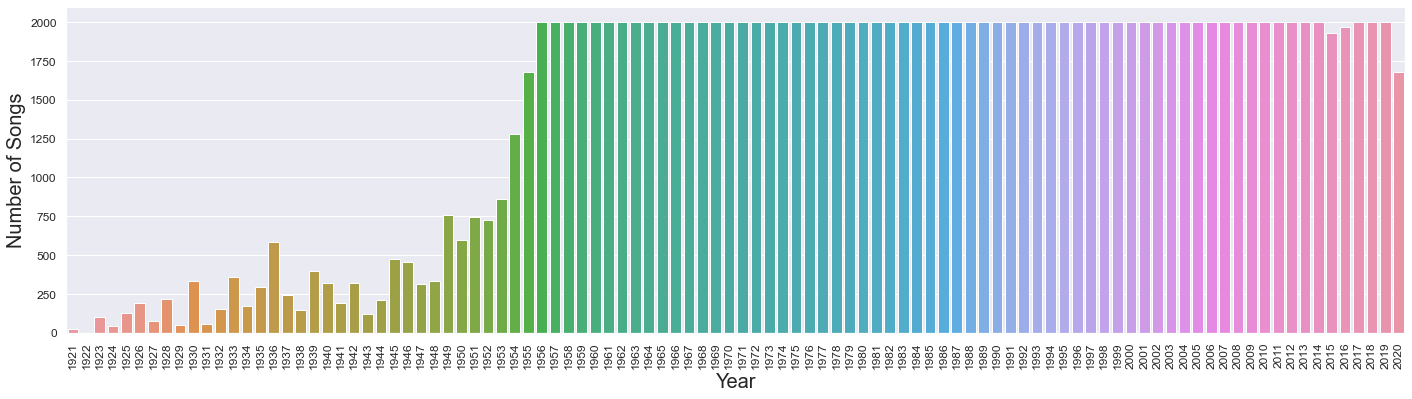

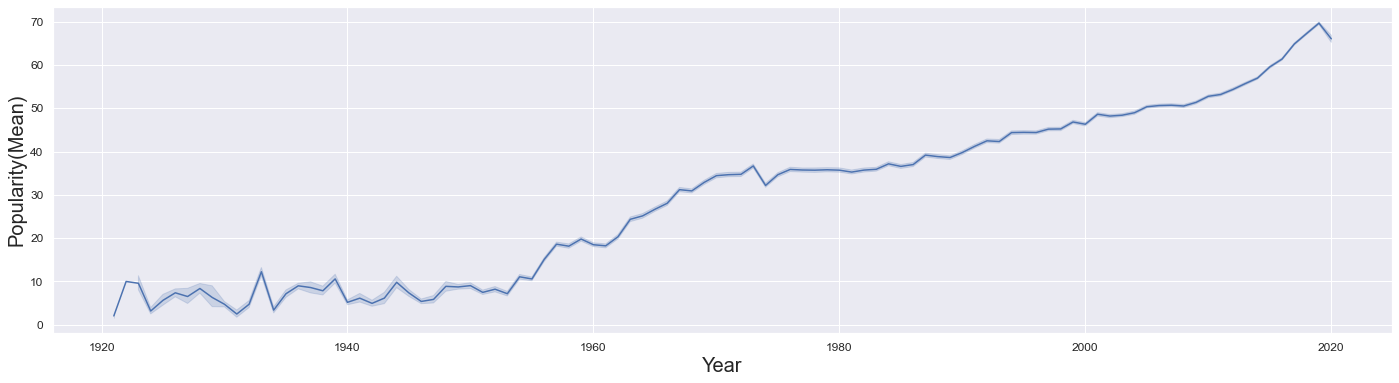

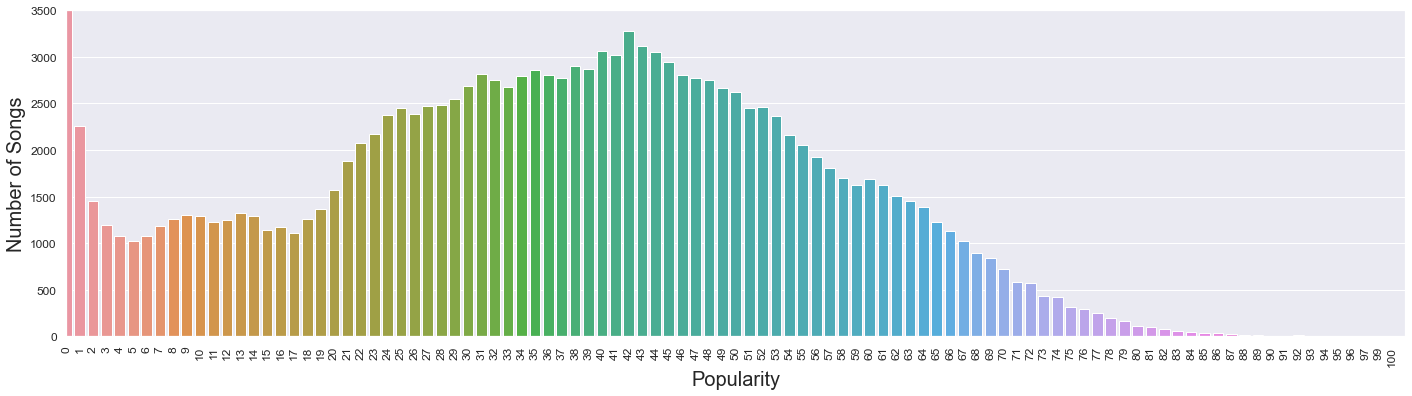

In [131]:
plt.figure(figsize=(24, 6))
# Graph1 number of songs which has popularity > 0 by year
yeargraph = sns.countplot(x="year", data=raw_spotify_data[raw_spotify_data['popularity'] > 0 ][['popularity','year']])
yeargraph.set_xticklabels(yeargraph.get_xticklabels(),rotation=90)
yeargraph.tick_params(labelsize=12)
yeargraph.set_xlabel("Year",fontsize=20)
yeargraph.set_ylabel("Number of Songs",fontsize=20)


# Graph2 Popularity Mean by years 
plt.figure(figsize=(24, 6))
yearline = sns.lineplot(x="year", y="popularity", data=raw_spotify_data[raw_spotify_data['popularity'] > 0 ][['popularity','year']])
yearline.set_xlabel("Year",fontsize=20)
yearline.set_ylabel("Popularity(Mean)",fontsize=20)
yearline.tick_params(labelsize=12)

# Graph3 popularity distribution
plt.figure(figsize=(24, 6))
counts = sns.countplot(x = raw_spotify_data["popularity"])
counts.set(xlim=(0,100), ylim=(0,3500))
counts.set_xlabel("Popularity",fontsize=20)
counts.set_ylabel("Number of Songs",fontsize=20)
counts.set_xticklabels(counts.get_xticklabels(),rotation=90)
counts.tick_params(labelsize=12)

As we can see above, popularity increases with years. This is expected as the newer a song is , the more likely it will have more listeners. However, interestingly, we can see that popularity is dropping at 2020. We need to investigate this further. 

Text(0, 0.5, 'Frequency')

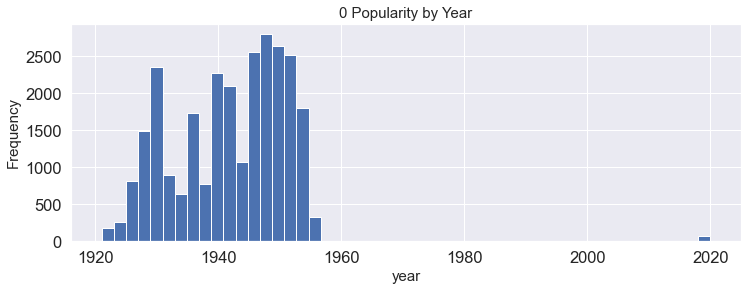

In [132]:
fig, ax = plt.subplots(figsize=(12, 4))
ax = raw_spotify_data['year'].loc[raw_spotify_data['popularity']==0].plot.hist(bins=50)
ax.set_title('0 Popularity by Year', fontsize=15)
ax.set_xlabel("year",fontsize=15)
ax.set_ylabel("Frequency",fontsize=15)

We can see above that there are outliers for 2020. This is assumed to be due to the fact that at the time of creating this data, some of the new songs did not have the opportunity to reach their popularity maturity. We have to look further into this.

In [133]:
raw_spotify_data.loc[(raw_spotify_data['popularity']==0) & (raw_spotify_data['year']==2020)].shape[0]

78

We can see that there are 78 songs with 0 popularity for 2020. 

Lets see what happens to the mean of 2020 when we don't take into account the 0 popularity songs.

In [134]:
print(f"Mean popularity for 2020 without 0 popularity songs: {raw_spotify_data.loc[(raw_spotify_data['popularity']!=0) & (raw_spotify_data['year']==2020)]['popularity'].mean()}")
print(f"Mean popularity for 2019 {raw_spotify_data.loc[(raw_spotify_data['year']==2019)]['popularity'].mean()}")


Mean popularity for 2020 without 0 popularity songs: 66.04469606674613
Mean popularity for 2019 69.6555


Even when 0 popularity songs are removed from 2020, the mean popularity is still below 2019. This must indicate a general problem with the popularity of 2020 songs

We will check Release date to see if it is a reliable column.


In [135]:
date_spotify =raw_spotify_data.copy()
date_spotify['release_month'] = pd.DatetimeIndex(date_spotify['release_date']).month
date_spotify['release_day'] = pd.DatetimeIndex(date_spotify['release_date']).day


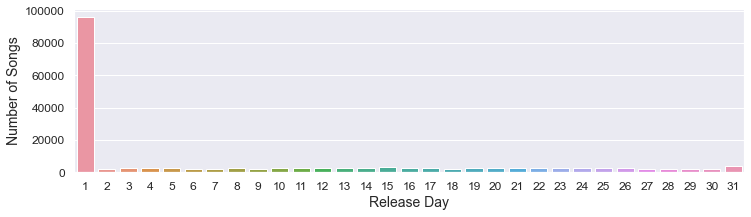

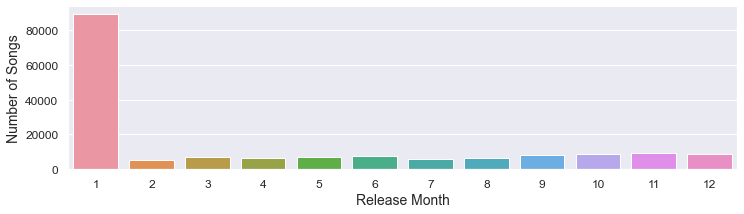

In [136]:
summary_data = date_spotify[['release_day','id']].groupby(['release_day']).agg('count')
plt.figure(figsize=(12,3))
release_day = sns.countplot(data=date_spotify , x="release_day")
release_day.set_xlabel("Release Day",fontsize=14)
release_day.set_ylabel("Number of Songs",fontsize=14)
release_day.set_xticklabels(release_day.get_xticklabels(),rotation=0)
release_day.tick_params(labelsize=12)

plt.figure(figsize=(12,3))
release_month = sns.countplot(data=date_spotify , x="release_month")
release_month.set_xlabel("Release Month",fontsize=14)
release_month.set_ylabel("Number of Songs",fontsize=14)
release_month.tick_params(labelsize=12)



As the release day and month for most songs is 01/01, release date is not a reliable column, hence it will be dropped. 

The popularity increases but it does not reach up to the level of 2019 or 2018. Because 2020 popularity data is not reliable we will drop 2020 from the dataframe.

# 2. Data Preperation
We don't need all of the data in our dataframe for our analysis. To make our predictions, we don't need id, release date, artists, name. These correspond to items with Dtype object. We can drop these from our dataframe. However, we want to be able to recall song name and artists later if needed. So we will save these to a new dataframe. Before we do this, we will also shuffle our data for good measure.

## Missing Data,  Non Numeric & Categorical Data , Data Transforms
1. One hot encoding for year and key
2. Drop object columns and columns with numeric data type but can not be used as feature like 'id'
3. Based on analysis over 2010> years popularity , we have decided to remove 2020 from prediction, since it is mature enough.

In [137]:
# HELPER FUNCTIONS
#collect the columns names for non-target features
def data_to_feature_and_target(data):
    features = []
    target = "popularity"
    for x in data.columns:
        if x != target:
            features.append(x)
    X = data[features].to_numpy()
    y = data[target].to_numpy()
    return X, y

def clean_dataset(spotify_data):
       
    # drop duplicates with same feature values but different ID. dirty data
    spotify_data.drop_duplicates()

    # dummies for key, year, mode and explicit. These are categorical values. 
    years = pd.get_dummies(spotify_data['year'])
    key = pd.get_dummies(spotify_data['key'],prefix="key")
    mode = pd.get_dummies(spotify_data['mode'],prefix="mode")
    explicit = pd.get_dummies(spotify_data['explicit'],prefix="ex")
    spotify_data.drop(columns=['year','key','mode','explicit'], inplace=True)
    # drop dtype = 'object' features (Artists, id, Name). These aren't required for prediction. 
    spotify_data.drop('release_date', axis=1, inplace=True) 
    spotify_data = spotify_data.select_dtypes(exclude=['object'])
    spotify_data  = pd.concat([spotify_data, years, key, mode, explicit], "columns")
    
    # We can convert duration from ms to minutes to have more intuitive data.
    # Normalization of duration to minutes
    spotify_data['duration_ms'] = spotify_data['duration_ms']/60000
    spotify_data.rename(columns={"duration_ms": "duration_m"},inplace=True)
    return spotify_data

## Data Transforms

In [138]:
# copy raw data to new dataframe to make all data changes and keep the original source as untouched.
spotify_data = raw_spotify_data.copy()

# shuffle dataset
spotify_data = spotify_data.reindex(np.random.permutation(spotify_data.index))

spotify_data = clean_dataset(spotify_data)
#2020 == 1 samples to be removed as justified before. 
spotify_data.drop(spotify_data.loc[spotify_data[2020]==1].index, inplace=True)

spotify_data.to_csv("spotify_data.csv")



In [139]:
# split features and target and convert to numpy.
X, y = data_to_feature_and_target(spotify_data)
# for classification problem, we define a threshold as 60 , 
# 0 : popularity < 60
# 1 : popularity > 60
popularity_level = 60
y_label =  (y>popularity_level).astype(int)

In [140]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# datasize = 50000 # sample
datasize = X.shape[0]  # full dataset
X_regression_train, X_regression_test, y_regression_train, y_regression_test = train_test_split(X[:datasize], y[:datasize] , test_size=0.25, random_state=42)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X[:datasize], y_label[:datasize] , test_size=0.25, random_state=42) 

In [141]:
# fit standard scaler
from sklearn.preprocessing import StandardScaler

sc_class = StandardScaler()
sc_class.fit(X_class_train)
X_class_train= sc_class.transform(X_class_train)
X_class_test = sc_class.transform(X_class_test)

# 2. Predict Song Popularity

## Predict Popularity with Neural networks ( Categorical & Regression )

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras 
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics

### Classification ( Popular or not )

In [143]:
# network structure with 2 hidden layer for binary classification
model_class = Sequential()
model_class.add(Dense(256, input_dim=X_class_train.shape[1], activation="relu"))
model_class.add(Dense(256,activation="relu"))
model_class.add(Dense(1,activation='sigmoid'))
optimizer = keras.optimizers.Adam(learning_rate=0.1)
# compile model
model_class.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
# train the model
model_fit = model_class.fit(X_class_train, y_class_train, verbose=1, epochs=10,validation_split=0.2, batch_size=50)
# display the model layers and parameters
model_class.summary()

Epoch 1/10
2018/2018 [==============================] - 4s 2ms/step - loss: 0.3309 - accuracy: 0.9186 - val_loss: 0.2843 - val_accuracy: 0.9177
Epoch 2/10
2018/2018 [==============================] - 3s 2ms/step - loss: 0.2882 - accuracy: 0.9165 - val_loss: 0.2851 - val_accuracy: 0.9177
Epoch 3/10
2018/2018 [==============================] - 3s 2ms/step - loss: 0.2883 - accuracy: 0.9165 - val_loss: 0.2843 - val_accuracy: 0.9177
Epoch 4/10
2018/2018 [==============================] - 3s 2ms/step - loss: 0.2880 - accuracy: 0.9165 - val_loss: 0.2845 - val_accuracy: 0.9177
Epoch 5/10
2018/2018 [==============================] - 3s 2ms/step - loss: 0.2881 - accuracy: 0.9165 - val_loss: 0.2852 - val_accuracy: 0.9177
Epoch 6/10
2018/2018 [==============================] - 5s 2ms/step - loss: 0.2883 - accuracy: 0.9165 - val_loss: 0.2858 - val_accuracy: 0.9177
Epoch 7/10
2018/2018 [==============================] - 5s 2ms/step - loss: 0.2883 - accuracy: 0.9165 - val_loss: 0.2851 - val_accuracy:

In [144]:
# model evalolution 
result_class = model_class.evaluate(X_class_train, y_class_train, verbose=1)
print(f'Training results - Loss: {result_class[0]} - {result_class[1]}')

result_class = model_class.evaluate(X_class_test, y_class_test, verbose=1)
print(f'Test results - Loss: {result_class[0]} - {result_class[1]}')

3942/3942 [==============================] - 5s 1ms/step - loss: 0.2870 - accuracy: 0.9168
Training results - Loss: 0.28702110052108765 - 0.9167658090591431
1314/1314 [==============================] - 3s 2ms/step - loss: 0.2942 - accuracy: 0.9137
Test results - Loss: 0.2941652536392212 - 0.9136515855789185


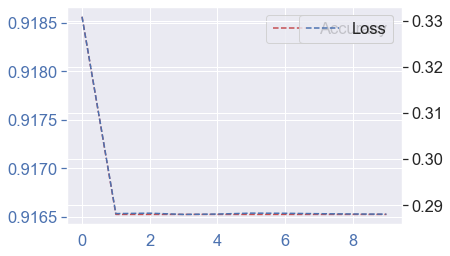

In [145]:
# Loss and accuracy graph with 2 axis ( Accuracy and Loss)
fig, ax = plt.subplots()
plt.plot(model_fit.history['accuracy'], '--r', label='Accuracy')
plt.legend()
ax.tick_params(colors='r')
ax2 = ax.twinx()
plt.plot(model_fit.history['loss'], '--b', label='Loss')
plt.legend()
ax.tick_params(colors='b')

### Regression ( How Popular )

In [146]:
# network structure with 2 hidden layer for regression
model_regression = Sequential()
model_regression.add(Dense(256, input_dim=X_regression_train.shape[1], activation='relu')) 
model_regression.add(Dropout(0.1))
model_regression.add(Dense(256, activation='relu')) # Hidden 1
model_regression.add(Dense(1)) # Output
optimizer = keras.optimizers.Adam(lr=0.001)
monitor = EarlyStopping(monitor='loss', min_delta=1e-2, patience=10, verbose=1, mode='auto')
#compile the model
model_regression.compile(loss='mean_squared_error', optimizer=optimizer)
# train the model
model_regression_fit = model_regression.fit(X_regression_train, y_regression_train, callbacks=[monitor], verbose=2, epochs=20,validation_split=0.2, batch_size=50)
# display model parameters
model_regression.summary()


Epoch 1/20
2018/2018 - 5s - loss: 150.8898 - val_loss: 81.8847
Epoch 2/20
2018/2018 - 5s - loss: 87.9450 - val_loss: 80.2293
Epoch 3/20
2018/2018 - 6s - loss: 85.2734 - val_loss: 79.2252
Epoch 4/20
2018/2018 - 6s - loss: 84.5883 - val_loss: 79.3150
Epoch 5/20
2018/2018 - 5s - loss: 83.9238 - val_loss: 78.9236
Epoch 6/20
2018/2018 - 5s - loss: 83.2365 - val_loss: 78.3163
Epoch 7/20
2018/2018 - 5s - loss: 82.9140 - val_loss: 79.3851
Epoch 8/20
2018/2018 - 5s - loss: 82.4978 - val_loss: 86.8932
Epoch 9/20
2018/2018 - 5s - loss: 82.5553 - val_loss: 78.6991
Epoch 10/20
2018/2018 - 4s - loss: 82.5332 - val_loss: 77.9027
Epoch 11/20
2018/2018 - 3s - loss: 81.5639 - val_loss: 78.8951
Epoch 12/20
2018/2018 - 3s - loss: 81.7105 - val_loss: 90.0832
Epoch 13/20
2018/2018 - 3s - loss: 81.7278 - val_loss: 80.3563
Epoch 14/20
2018/2018 - 4s - loss: 81.4007 - val_loss: 81.4782
Epoch 15/20
2018/2018 - 3s - loss: 81.5950 - val_loss: 78.7219
Epoch 16/20
2018/2018 - 3s - loss: 81.1552 - val_loss: 78.4320


In [147]:
# model evolution
result_regression = model_regression.evaluate(X_regression_test, y_regression_test, verbose=1)
print(f'Test results - Loss: {result_regression}')
pred_regression = model_regression.predict(X_regression_test)
score_regression = np.sqrt(metrics.mean_squared_error(pred_regression,y_regression_test))
print(f"Final score (RMSE): {score_regression}")


1314/1314 [==============================] - 2s 1ms/step - loss: 79.5704
Test results - Loss: 79.57041931152344
Final score (RMSE): 8.920223449495444


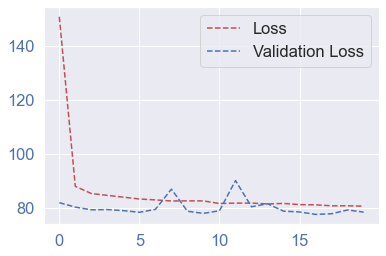

In [148]:
# loss graphs
fig, ax = plt.subplots()
plt.plot(model_regression_fit.history['loss'], '--r', label='Loss')
plt.plot(model_regression_fit.history['val_loss'], '--b', label='Validation Loss')
plt.legend()
ax.tick_params(colors='b')

In [149]:
# first 50 prediction other than 0
for i in range(10):
    if y_regression_test[i] !=0: 
        print(f" {i+1} predicted as {pred_regression[i]} vs {y_regression_test[i]}")


 1 predicted as [18.898937] vs 13
 2 predicted as [69.381935] vs 70
 3 predicted as [42.63894] vs 49
 4 predicted as [49.227097] vs 49
 5 predicted as [7.401242] vs 15
 6 predicted as [53.877586] vs 53
 7 predicted as [50.844368] vs 52
 8 predicted as [47.19114] vs 50
 9 predicted as [46.430794] vs 45
 10 predicted as [51.03373] vs 50


## Predict Popularity with Random Forest ( Regression )

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [151]:
##!!!THIS SEARCH TAKES TIME TO PERFORM AND IS OPTIONAL!!!
#Before training set is split into training & validation sets, cross validation grid search can be performed
#Grid Search
# estimators = list(range(1, 50))
# features = list(range(1, 40))
# grid_search = GridSearchCV(
#         estimator=RandomForestRegressor(criterion='mse'),
#         param_grid={
#             'n_estimators': estimators,
#             'max_features': features
#         },
#         cv=5, verbose=0, n_jobs=-1)

# optimized_forest = grid_search.fit(X_regression_train, y_regression_train)
# best_params = optimized_forest.best_params_
# y_pred = optimized_forest.predict(X_regression_test)
# score = np.sqrt(metrics.mean_squared_error(y_pred, y_regression_test))
# print(f"Final score (RMSE): {score}")

In [152]:
# Split the training dataset into validation & training sets
X_regression_train, X_regression_valid, y_regression_train, y_regression_valid = train_test_split(X_regression_train, y_regression_train , test_size=0.2, random_state=42)

In [153]:
##!!!THIS SEARCH TAKES TIME TO PERFORM AND IS OPTIONAL!!!
# Graph Search for n_estimators between 1 - 300 at steps of 50
# trees_no = []
# error_history = []
# for i in range(1, 350, 50):
#     Random_Forest = RandomForestRegressor(n_estimators=i, criterion="mse", max_features = 25)
#     Random_Forest.fit(X_regression_train, y_regression_train)
#     y_pred = Random_Forest.predict(X_regression_valid)
#     score = np.sqrt(metrics.mean_squared_error(y_pred,y_regression_valid))
#     error_history.append(score)
#     trees_no.append(i)

# plt.figure(figsize=(16, 8))
# graph = sns.lineplot(x=trees_no, y=error_history, ci=None)
# graph.set_xlabel("n_estimators",fontsize=30)
# graph.set_ylabel("RMSE",fontsize=30)
# graph.tick_params(labelsize=15)
# plt.show()

In [154]:
##!!!THIS SEARCH TAKES TIME TO PERFORM AND IS OPTIONAL!!!
# Graph Search for n_estimators between 1 - 50 at steps of 1 
# trees_no = []
# error_history = []
# for i in range(1, 51):
#     Random_Forest = RandomForestRegressor(n_estimators=i, criterion="mse", max_features = 25)
#     Random_Forest.fit(X_regression_train, y_regression_train)
#     y_pred = Random_Forest.predict(X_regression_valid)
#     score = np.sqrt(metrics.mean_squared_error(y_pred,y_regression_valid))
#     error_history.append(score)
#     trees_no.append(i)

# plt.figure(figsize=(16, 8))
# graph = sns.lineplot(x=trees_no, y=error_history, ci=None)
# graph.set_xlabel("n_estimators",fontsize=30)
# graph.set_ylabel("RMSE",fontsize=30)
# graph.tick_params(labelsize=15)
# plt.show()

In [155]:
##!!!THIS SEARCH TAKES TIME TO PERFORM AND IS OPTIONAL!!!
# Graph Search for max_features between 1 - 35 at steps of 1 
# features_no = []
# error_history = []
# for i in range(1, 36):
#     Random_Forest = RandomForestRegressor(n_estimators=50, criterion="mse", max_features=i)
#     Random_Forest.fit(X_regression_train, y_regression_train)
#     y_pred = Random_Forest.predict(X_regression_valid)
#     score = np.sqrt(metrics.mean_squared_error(y_pred,y_regression_valid))
#     error_history.append(score)
#     features_no.append(i)

# plt.figure(figsize=(16, 8))
# graph = sns.lineplot(x=features_no, y=error_history, ci=None)
# graph.set_xlabel("max_features",fontsize=30)
# graph.set_ylabel("RMSE",fontsize=30)
# graph.tick_params(labelsize=15)
# plt.show()

In [156]:
# Final Random Forest with the chosen parameters
Random_Forest = RandomForestRegressor(n_estimators=30, criterion="mse", max_features = 25)
Random_Forest.fit(X_regression_train, y_regression_train)
y_pred = Random_Forest.predict(X_regression_test)
score = np.sqrt(metrics.mean_squared_error(y_pred, y_regression_test))
print(f"Final score (RMSE): {score}")
for i in range(50):
    print(f"{i+1}. song predicted as {round(y_pred[i])} vs actual label {y_regression_test[i]}")

Final score (RMSE): 10.88480692671501
1. song predicted as 22.0 vs actual label 13
2. song predicted as 68.0 vs actual label 70
3. song predicted as 42.0 vs actual label 49
4. song predicted as 41.0 vs actual label 49
5. song predicted as 11.0 vs actual label 15
6. song predicted as 52.0 vs actual label 53
7. song predicted as 52.0 vs actual label 52
8. song predicted as 42.0 vs actual label 50
9. song predicted as 48.0 vs actual label 45
10. song predicted as 43.0 vs actual label 50
11. song predicted as 38.0 vs actual label 44
12. song predicted as 34.0 vs actual label 32
13. song predicted as 47.0 vs actual label 39
14. song predicted as 5.0 vs actual label 0
15. song predicted as 42.0 vs actual label 27
16. song predicted as 44.0 vs actual label 40
17. song predicted as 50.0 vs actual label 40
18. song predicted as 0.0 vs actual label 0
19. song predicted as 12.0 vs actual label 0
20. song predicted as 47.0 vs actual label 64
21. song predicted as 65.0 vs actual label 61
22. song p

## Feature Importance with Random forest

In [157]:
# If running this section directly before sections above, these imports can be used
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

In [158]:
# Create simplified dataset for feature importances
feat_imp_data = raw_spotify_data.copy()
# Shuffle
feat_imp_data = feat_imp_data.reindex(np.random.permutation(feat_imp_data.index))
# Drop id to find duplicates
feat_imp_data.drop(columns='id', inplace=True)
# Drop duplicates
feat_imp_data.drop_duplicates()
# Drop objects
feat_imp_data = feat_imp_data.select_dtypes(exclude=['object'])
# Drop release date
feat_imp_data.drop('release_date', axis=1, inplace=True)
# Drop year 2020 due to unreliability 
feat_imp_data.drop(feat_imp_data.loc[feat_imp_data['year']==2020].index, inplace=True)

In [159]:
# View the new dataset for feature importance
feat_imp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168153 entries, 135928 to 123167
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      168153 non-null  float64
 1   danceability      168153 non-null  float64
 2   duration_ms       168153 non-null  int64  
 3   energy            168153 non-null  float64
 4   explicit          168153 non-null  int64  
 5   instrumentalness  168153 non-null  float64
 6   key               168153 non-null  int64  
 7   liveness          168153 non-null  float64
 8   loudness          168153 non-null  float64
 9   mode              168153 non-null  int64  
 10  popularity        168153 non-null  int64  
 11  speechiness       168153 non-null  float64
 12  tempo             168153 non-null  float64
 13  valence           168153 non-null  float64
 14  year              168153 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 20.5 MB


In [160]:
# Create X & y
X, y = data_to_feature_and_target(feat_imp_data)

In [161]:
# Create features list 
features = []
target = "popularity"
for x in feat_imp_data.columns:
        if x != target:
            features.append(x)
features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence',
 'year']

In [162]:
# We need to convert features list to numpy array for sorting later
features = np.array(features)

In [163]:
# Split training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state=42)

In [164]:
# Use standard scaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [168]:
# It is ok to skip this section to go down straight to analysis with the optimum parameters
# We can find best max_features parameter for our new dataset
# Graph Search for max_features between 1 - 7
# features_no = []
# error_history = []
# for i in range(1, 8):
#     Random_Forest = RandomForestRegressor(n_estimators=10, criterion="mse", max_features=i)
#     Random_Forest.fit(X_train, y_train)
#     y_pred = Random_Forest.predict(X_valid)
#     score = np.sqrt(metrics.mean_squared_error(y_pred,y_valid))
#     error_history.append(score)
#     features_no.append(i)

# plt.figure(figsize=(12, 6))
# graph = sns.lineplot(x=features_no, y=error_history, ci=None)
# graph.set_xlabel("max_features",fontsize=20)
# graph.set_ylabel("RMSE",fontsize=20)
# graph.tick_params(labelsize=15)
# plt.show()

In [169]:
# It is ok to skip this section to go down straight to analysis with the optimum parameters
# We can find best n_estimators parameter for our new dataset
# Graph Search for n_estimators between 1 - 20
# trees_no = []
# error_history = []
# for i in range(1, 21):
#     Random_Forest = RandomForestRegressor(n_estimators=i, criterion="mse", max_features = 4)
#     Random_Forest.fit(X_train, y_train)
#     y_pred = Random_Forest.predict(X_valid)
#     score = np.sqrt(metrics.mean_squared_error(y_pred,y_valid))
#     error_history.append(score)
#     trees_no.append(i)

# plt.figure(figsize=(12, 6))
# graph = sns.lineplot(x=trees_no, y=error_history, ci=None)
# graph.set_xlabel("n_estimators",fontsize=20)
# graph.set_ylabel("RMSE",fontsize=20)
# graph.tick_params(labelsize=15)
# plt.show()

In [170]:
# Create Random Forest instance with the chosen parameters
Random_Forest = RandomForestRegressor(n_estimators=15, criterion="mse", max_features = 4)
Random_Forest.fit(X_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=15)

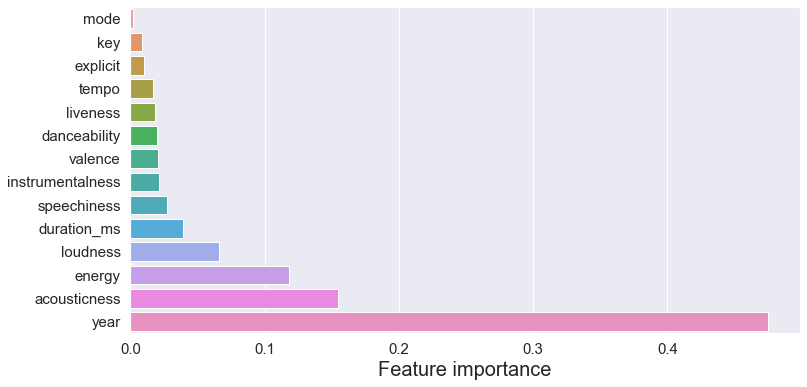

In [171]:
# Create sorted feature importance barplot
sorted_features = Random_Forest.feature_importances_.argsort()
plt.figure(figsize=(12, 6))
graph = sns.barplot(x=Random_Forest.feature_importances_[sorted_features], y=features[sorted_features])
graph.set_xlabel("Feature importance",fontsize=20)
graph.tick_params(labelsize=15)
plt.show()

# 3. Prediction for New Album Releases from SPOTIFY API
In this section we use Spotify WEB API to get new releases , album details and audio features and run the prediction for them. 

In [172]:
import requests
import json
import pandas as pd
import base64

## SPOTIFY WEB API authentication prep.

# request header preparation
def get_api_headers(token):  
    return {"accept":"application/json",
        "Content-Type": "application/json",
        "charset" : "UTF-8",
        "Authorization" : "Bearer " + token
        } 
# Spotify API authentication with client ID and Secret
# client and secret should be base 64 encoded.        
def get_access_token():
    content = "46530d148ff244418451e5ac4e4ae91c:3e4931fbca6d4580a117e836023a515c"
    encodedBytes = base64.b64encode(content.encode("utf-8"))
    encodedStr = str(encodedBytes, "utf-8")
    return {
        "Authorization" : "Basic " + encodedStr
        } 
def get_body():
    return  {
        'grant_type': 'client_credentials'
        }
# curl Spotify endpoint via requests
token_request = requests.post("https://accounts.spotify.com/api/token", data=get_body(), headers=get_access_token())
if token_request.status_code == 200:
    token = json.loads(token_request.content)['access_token']
else:
    raise Exception('Authorization Error')
headers = get_api_headers(token)

In [173]:

# Number of new album retrived from Web API
limit = 10


# get the new releases
url_for_new_releases = "https://api.spotify.com/v1/browse/new-releases?limit="+ str(limit)
song_list = [] 
resp = requests.get(url_for_new_releases, headers=headers,verify=True)
# if the request is succesfull, http response code is 200. 
if resp.status_code == 200 :
    content = json.loads(resp.content)
    for album in content['albums']['items']:
        # get album details and tracks in the album
        url_for_album_tracks = 	"https://api.spotify.com/v1/albums/" + album['id'] +"/tracks"
        tracks = requests.get(url_for_album_tracks, headers=headers,verify=True)
        if tracks.status_code == 200:
            songs = json.loads(tracks.content)
            for song in songs['items']:
                # get son details and audio features. 
                url_for_song_features = "https://api.spotify.com/v1/audio-features/" + song['id']
                features = requests.get(url_for_song_features, headers=headers,verify=True)
                if features.status_code == 200:
                    audio_features = json.loads(features.content)
                    audio_features['album_name'] = album["name"]
                    audio_features['image'] = album['images'][0]['url']
                    audio_features['release_date'] = album["release_date"]
                    audio_features['year'] = album["release_date"][0:4]
                    audio_features['name'] = song['name']
                    audio_features['artist_name'] = album['artists'][0]['name']
                    audio_features['explicit'] = 0
                    song_list.append(audio_features)

new_releases_data = pd.DataFrame(song_list)
new_releases_data.head()

# clean the data comin from spotify API
new_release_to_model = new_releases_data.copy()
new_release_to_model = clean_dataset(new_release_to_model)
new_release_to_model.drop('time_signature', axis=1, inplace=True) 

# fill the 
#new_release_to_model['ex_0'] = 1
#new_release_to_model[2020] = 1

reshaped_data = pd.DataFrame(new_release_to_model,columns = spotify_data.columns)
reshaped_data.fillna(0, inplace=True)

In [174]:
from IPython.display import HTML

# prediction for new data, for this model , neural network regression model should be trained under section 2 
X_live, y_live = data_to_feature_and_target(reshaped_data)
y_pred_live = model_regression.predict(X_live)

# move prediction to pandas to prepare output
popularity_live = pd.DataFrame(y_pred_live, columns=['popularity'])
data_to_display = pd.concat([new_releases_data, popularity_live], "columns")

# formatter function for images. 
def display_image(url):
    return '<img src="'+ url + ' " width=200 height=200 />'

data_to_display = data_to_display[['image','artist_name','name','album_name','popularity']]

# output the result in an HTML table
HTML(data_to_display.to_html(escape=False ,max_rows=10, formatters=dict(image=display_image)))

,image,artist_name,name,album_name,popularity
0,,Imanbek,Goodbye,Goodbye,34.665791
1,,Eminem,Alfred - Intro,Music To Be Murdered By - Side B (Deluxe Edition),24.482779
2,,Eminem,Black Magic (feat. Skylar Grey),Music To Be Murdered By - Side B (Deluxe Edition),32.641006
3,,Eminem,Alfred’s Theme,Music To Be Murdered By - Side B (Deluxe Edition),31.304935
4,,Eminem,Tone Deaf,Music To Be Murdered By - Side B (Deluxe Edition),36.388332
...,...,...,...,...,...
42,,jxdn,Angels & Demons,Better Off Dead,32.274578
43,,dvsn,Blessings,Blessings,34.756424
44,,Tyla Yaweh,All the Smoke (feat. Gunna & Wiz Khalifa),All the Smoke (feat. Gunna & Wiz Khalifa),35.507553
45,,R3HAB,Ones You Miss,Ones You Miss,34.660793
